In [164]:
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import skimage.io as io

from skimage.restoration import denoise_bilateral # Filtro bilateral

### 2. Carga y Visualización de Imágenes

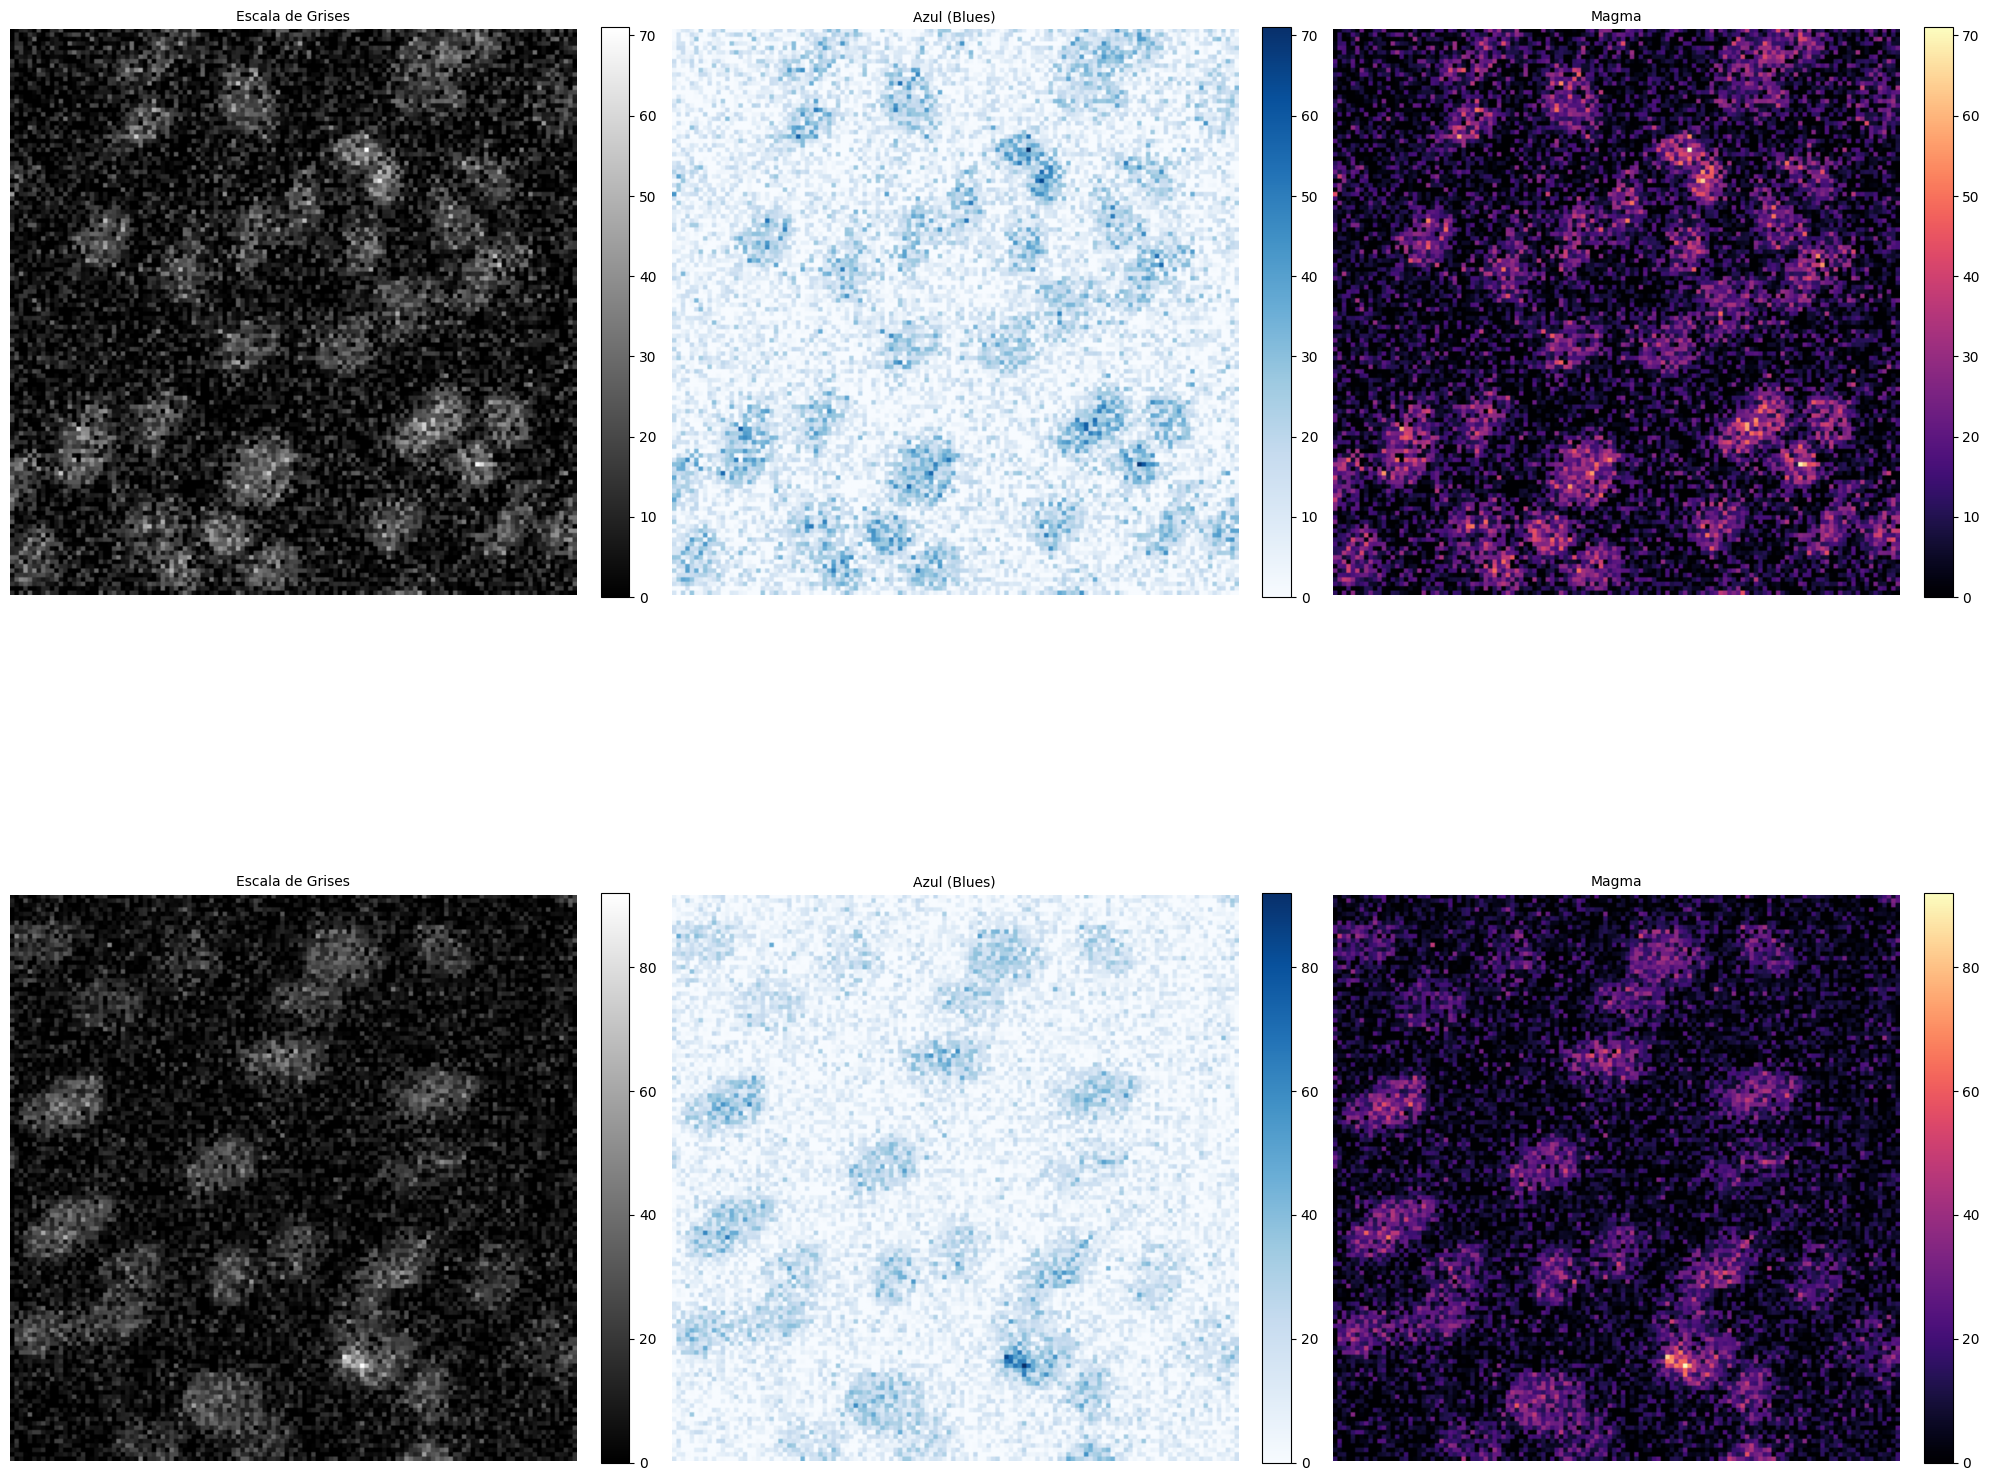

In [165]:
# load all images paths
image_paths = glob.glob('a_train-low/*.tif')


def get_random_images(image_paths, n=2):
    seed = 54
    random_seed = np.random.RandomState(seed)
    return random_seed.choice(image_paths, n)


def display_images_with_luts(images, colormaps, titles=None):
    fig, ax = plt.subplots(len(images), len(colormaps), figsize=(20, 20))

    for i, image in enumerate(images):
        for j, cmap in enumerate(colormaps):
            ax[i, j].imshow(image, cmap=cmap)
            ax[i, j].set_title(f'{titles[j]}', fontsize=10)
            ax[i, j].axis('off')
            ax[i, j].colorbar = plt.colorbar(
                ax[i, j].images[0], ax=ax[i, j], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()


# load random images
images = [io.imread(image_path)
          for image_path in get_random_images(image_paths)]

# LUTs
colormaps = ['gray', 'Blues', 'magma']
titles = ['Escala de Grises', 'Azul (Blues)', 'Magma']


display_images_with_luts(images, colormaps, titles)

Al aplicar LUTs podemos apreciar que la escala de azules es la que menos información visual distinguible nos da, mientras que la escala de grises que es la más común nos da una mejor visualización de la imagen y la escala de magma nos da una visualización más detallada de la imagen por su colorido.

### 3. Cálculo y Comparación de Histogramas

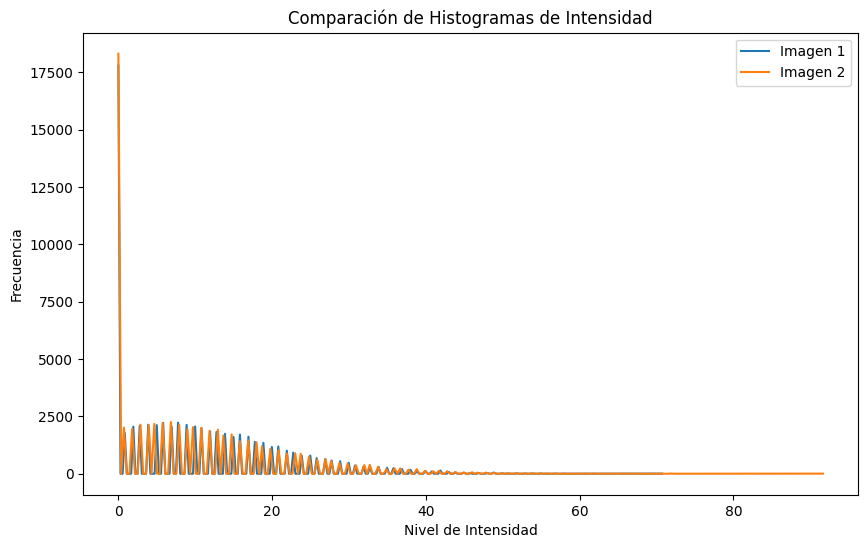

In [166]:
# Calcular y mostrar histogramas
def plot_histograms(images, bins=256):
    plt.figure(figsize=(10, 6))
    
    for i, image in enumerate(images):
        histogram, bin_edges = np.histogram(image, bins=bins, range=(0, image.max()))
        plt.plot(bin_edges[0:-1], histogram, label=f'Imagen {i+1}')
    
    plt.title("Comparación de Histogramas de Intensidad")
    plt.xlabel("Nivel de Intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

# Graficar histogramas de las imágenes seleccionadas
plot_histograms(images)


### 4. Eliminación de Ruido con Filtros de Suavizado


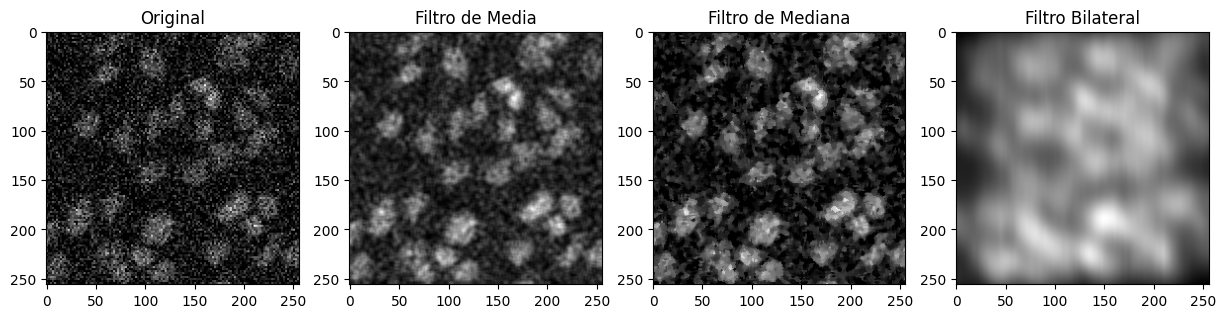

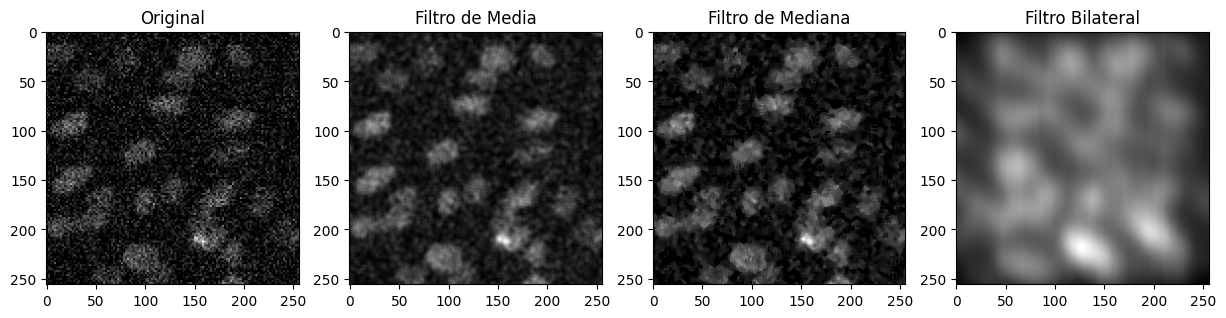

In [167]:
def apply_smoothing_filters(image):
    smoothed_mean = cv2.blur(image, (5, 5))  # like uniform_filter
    smoothed_median = cv2.medianBlur(image, 5)
    bilateral_filtered = denoise_bilateral(
        image, sigma_color=0.05, sigma_spatial=15)
    return smoothed_mean, smoothed_median, bilateral_filtered


def display_smoothing_results(images):
    filtered_images = []
    for i, image in enumerate(images):
        smoothed_mean, smoothed_median, bilateral_filtered = apply_smoothing_filters(
            image)
        filtered_images.append(
            (smoothed_mean, smoothed_median, bilateral_filtered))

        plt.figure(figsize=(15, 5))
        plt.subplot(1, 4, 1)
        plt.title("Original")
        plt.imshow(image, cmap='gray')

        plt.subplot(1, 4, 2)
        plt.title("Filtro de Media")
        plt.imshow(smoothed_mean, cmap='gray')

        plt.subplot(1, 4, 3)
        plt.title("Filtro de Mediana")
        plt.imshow(smoothed_median, cmap='gray')

        plt.subplot(1, 4, 4)
        plt.title("Filtro Bilateral")
        plt.imshow(bilateral_filtered, cmap='gray')

        plt.show()

    return filtered_images


filtered_images_tuple = display_smoothing_results(images)

### 5. Realce de Imágenes mediante Operadores Aritméticos


---------------- Filtros de Mediana ----------------


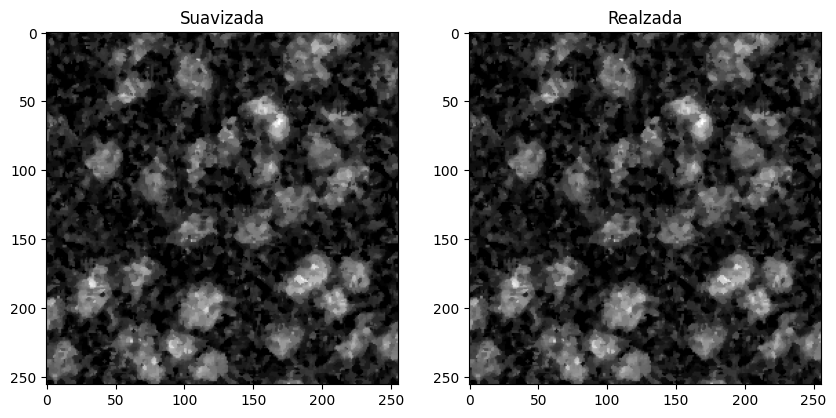

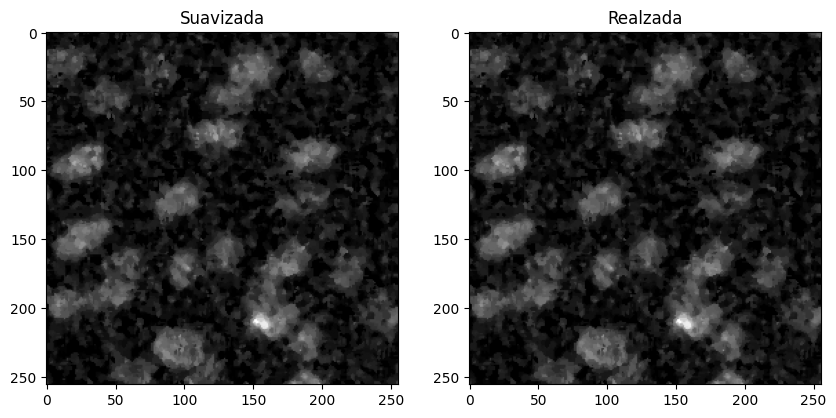

---------------- Filtros de Media ----------------


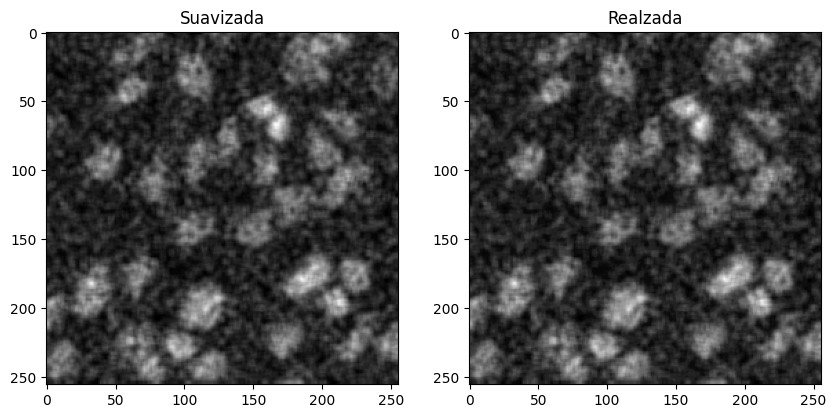

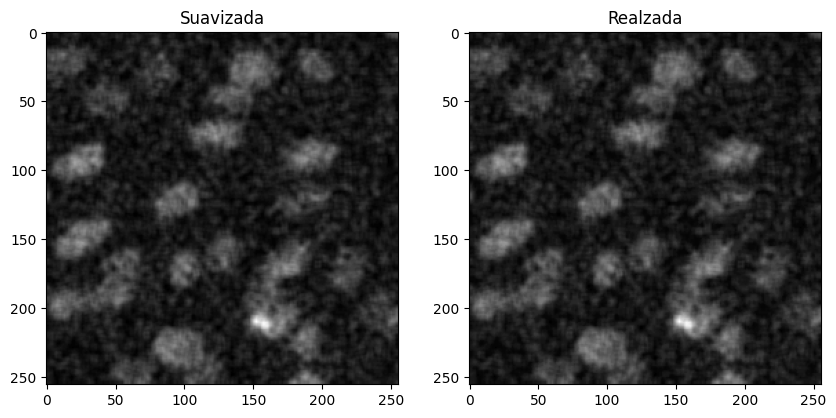

---------------- Filtros Bilaterales ----------------


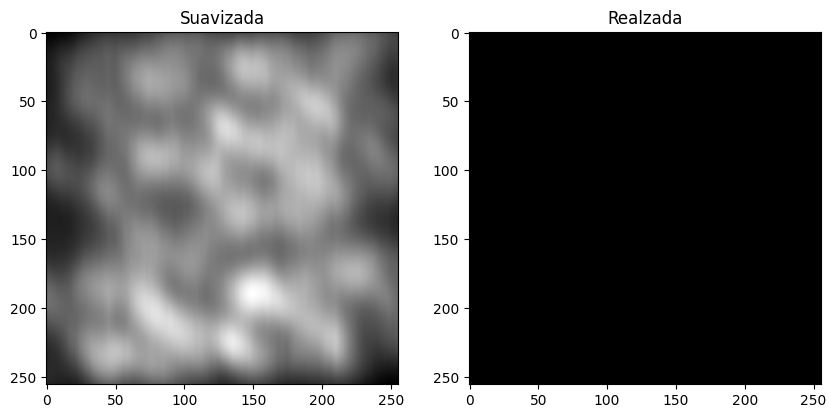

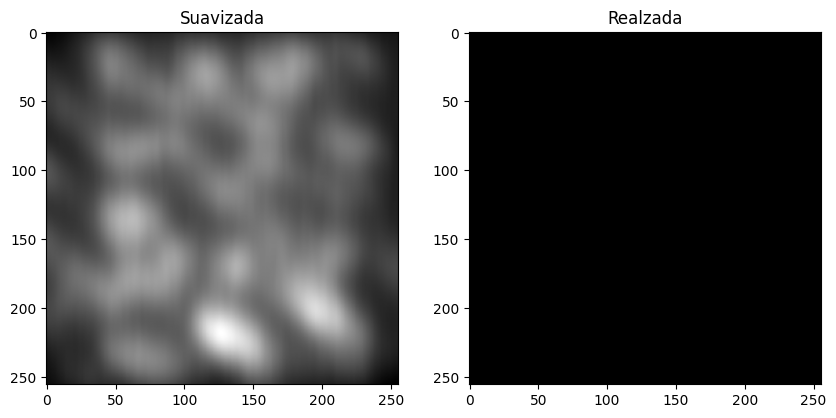

In [168]:
# Realzar imagen con multiplicación
def enhance_image(image, factor=1.5):
    enhanced_image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return enhanced_image


def display_enhanced_images(images):
    enhanced_images = []
    for i, image in enumerate(images):
        enhanced_image = enhance_image(image)
        enhanced_images.append(enhanced_image)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title("Suavizada")
        plt.imshow(image, cmap='gray')

        plt.subplot(1, 2, 2)
        plt.title("Realzada")
        plt.imshow(enhanced_image, cmap='gray')

        plt.show()
    return enhanced_images


median_filtered_images = [
    smoothed_median for smoothed_mean, smoothed_median, bilateral_filter in filtered_images_tuple]
mean_filtered_images = [smoothed_mean for smoothed_mean,
                        smoothed_median, bilateral_filter in filtered_images_tuple]
bilateral_filtered_images = [bilateral_filter for smoothed_mean,
                             smoothed_median, bilateral_filter in filtered_images_tuple]

print("---------------- Filtros de Mediana ----------------")
enhanced_images_median = display_enhanced_images(median_filtered_images)
print("---------------- Filtros de Media ----------------")
enhanced_images_mean = display_enhanced_images(mean_filtered_images)
print("---------------- Filtros Bilaterales ----------------")
enhanced_images_bilateral = display_enhanced_images(bilateral_filtered_images)

### 6. Comparación con Imágenes de Referencia


---------------- Filtros de Mediana ----------------


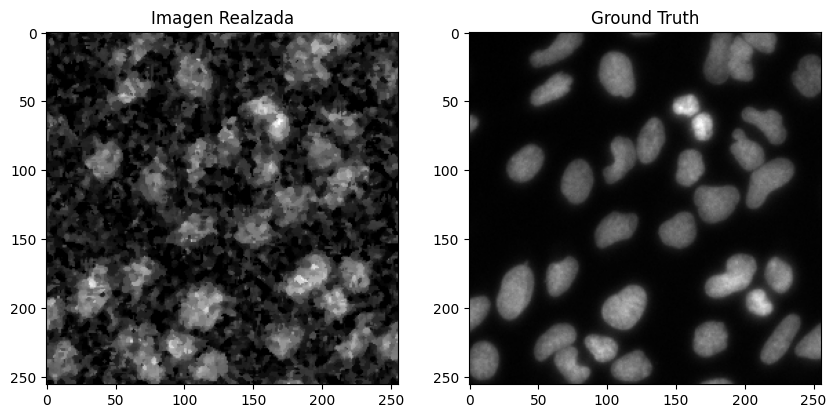

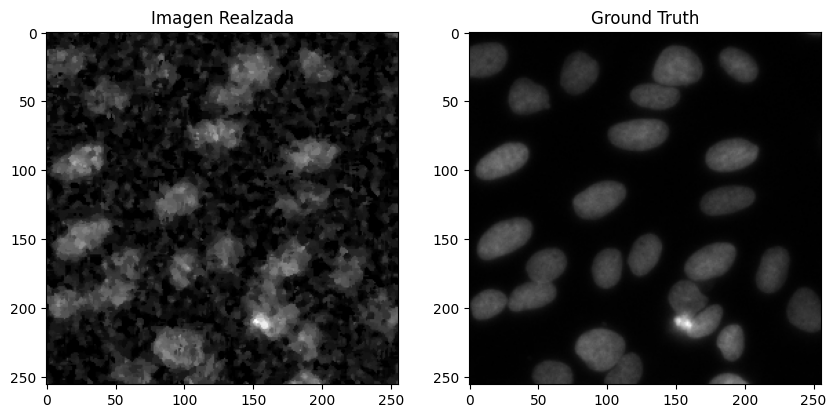

---------------- Filtros de Media ----------------


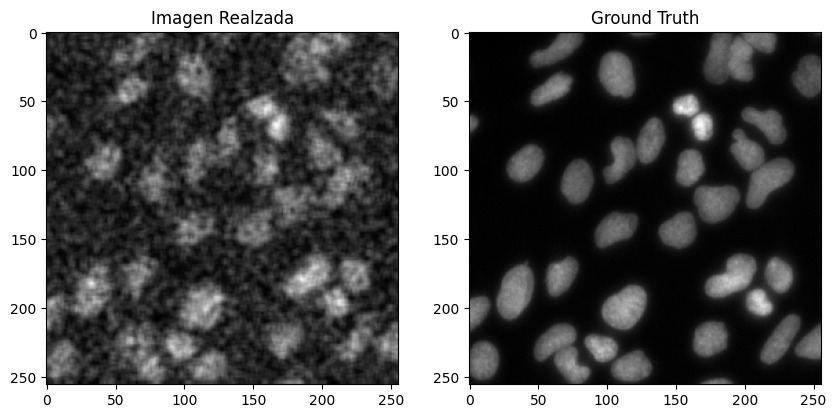

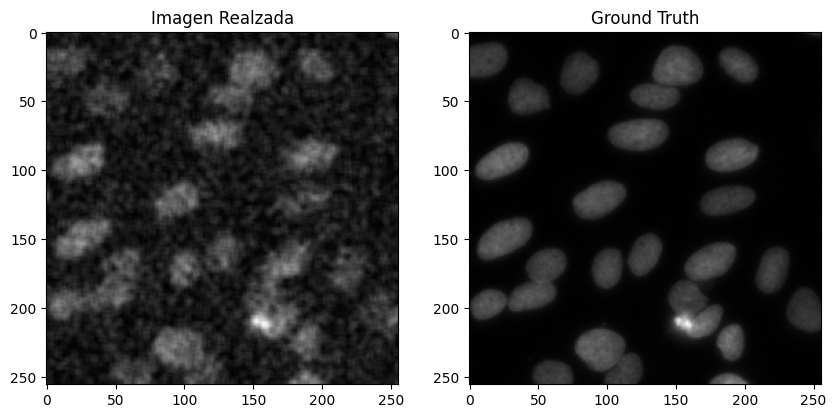

---------------- Filtros Bilaterales ----------------


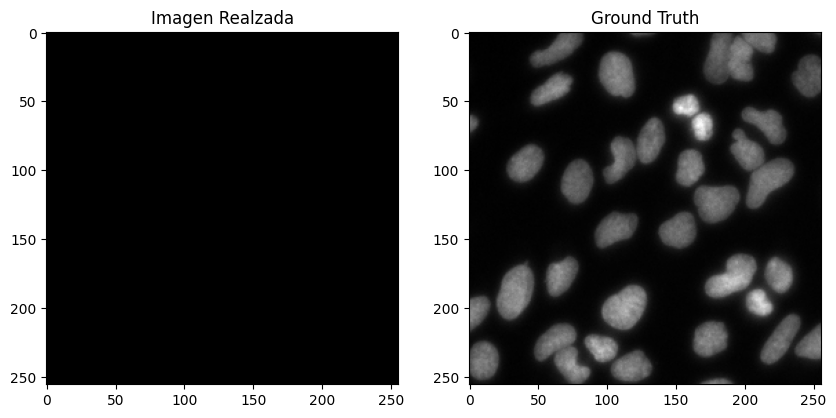

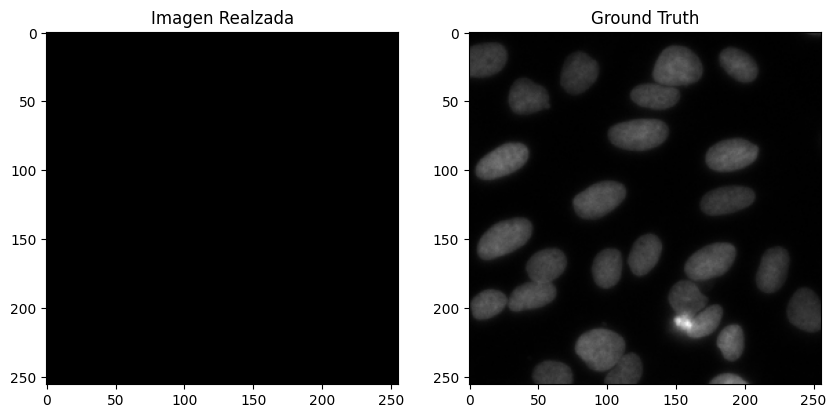

In [169]:
gt_paths = glob.glob('b_train-gt/*.tif')
gt_images = [io.imread(path)
             for path in get_random_images(gt_paths, len(images))]


def compare_with_ground_truth(enhanced_images, gt_images):
    for i, (enhanced, gt) in enumerate(zip(enhanced_images, gt_images)):
        plt.figure(figsize=(10, 5))

        # Imagen Realzada
        plt.subplot(1, 2, 1)
        plt.title("Imagen Realzada")
        plt.imshow(enhanced, cmap='gray')

        # Ground Truth
        plt.subplot(1, 2, 2)
        plt.title("Ground Truth")
        plt.imshow(gt, cmap='gray')

        plt.show()


print("---------------- Filtros de Mediana ----------------")
compare_with_ground_truth(enhanced_images_median, gt_images)
print("---------------- Filtros de Media ----------------")
compare_with_ground_truth(enhanced_images_mean, gt_images)
print("---------------- Filtros Bilaterales ----------------")
compare_with_ground_truth(enhanced_images_bilateral, gt_images)

### 7. Cuantificación de la Calidad con MSE


---------------- Filtros de Mediana ----------------
MSE: 113608.88
MSE: 121632.43
---------------- Filtros de Media ----------------
MSE: 112825.43
MSE: 120841.17
---------------- Filtros Bilaterales ----------------
MSE: 124749.69
MSE: 133460.64
---------------- Filtros de Mediana ----------------


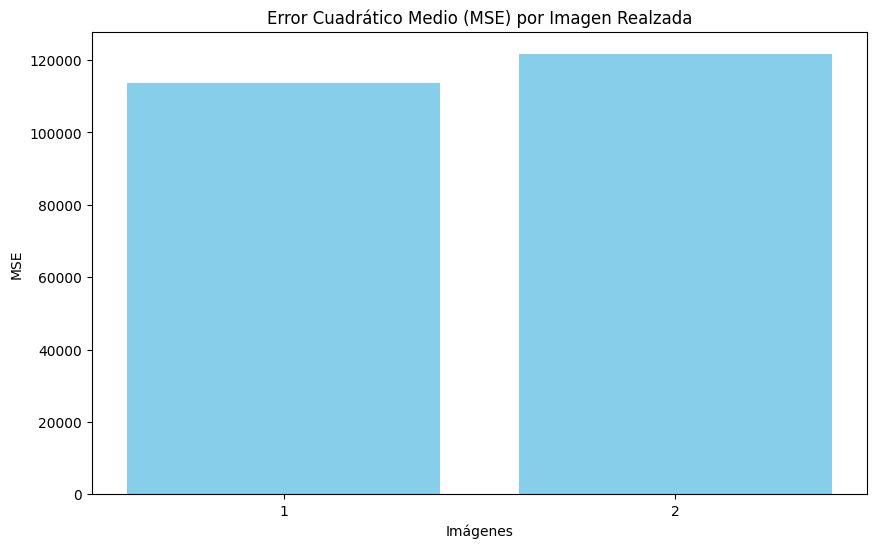

---------------- Filtros de Media ----------------


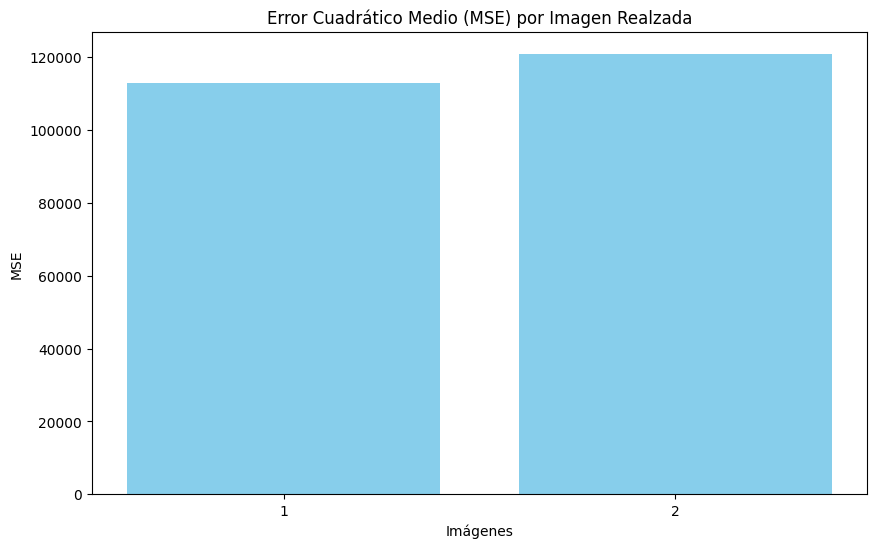

---------------- Filtros Bilaterales ----------------


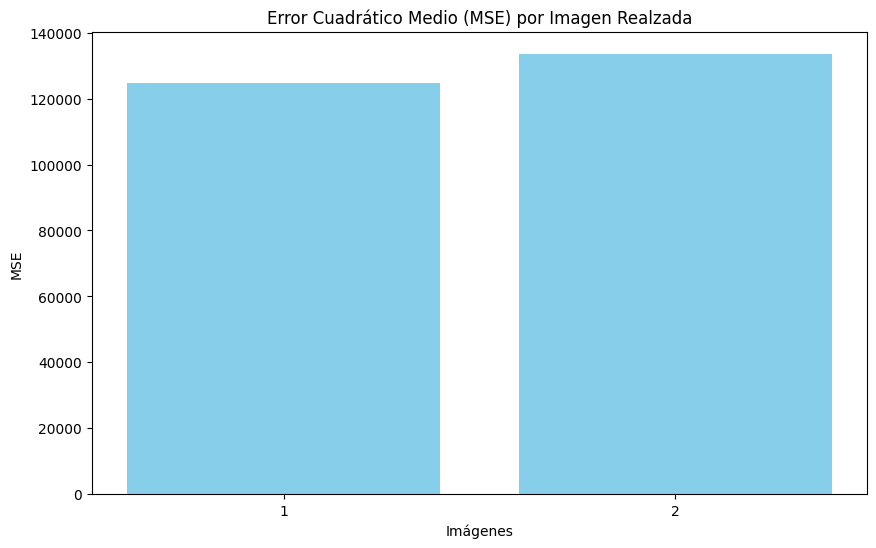

In [170]:
from skimage.metrics import mean_squared_error as mse


def calculate_mse(enhanced_images, gt_images):
    mse_values = []
    for enhanced, gt in zip(enhanced_images, gt_images):
        mse_value = mse(enhanced, gt)
        mse_values.append(mse_value)
        print(f"MSE: {mse_value:.2f}")
    return mse_values


# mse_values = calculate_mse(enhanced_images, gt_images)
print("---------------- Filtros de Mediana ----------------")
mse_values_median = calculate_mse(enhanced_images_median, gt_images)
print("---------------- Filtros de Media ----------------")
mse_values_mean = calculate_mse(enhanced_images_mean, gt_images)
print("---------------- Filtros Bilaterales ----------------")
mse_values_bilateral = calculate_mse(enhanced_images_bilateral, gt_images)


def plot_mse(mse_values):
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(mse_values) + 1), mse_values, color='skyblue')
    plt.title("Error Cuadrático Medio (MSE) por Imagen Realzada")
    plt.xlabel("Imágenes")
    plt.ylabel("MSE")
    plt.xticks(range(1, len(mse_values) + 1))
    plt.show()


# Graficar los valores de MSE
print("---------------- Filtros de Mediana ----------------")
plot_mse(mse_values_median)
print("---------------- Filtros de Media ----------------")
plot_mse(mse_values_mean)
print("---------------- Filtros Bilaterales ----------------")
plot_mse(mse_values_bilateral)